<a href="https://colab.research.google.com/github/FelipeCabeza16/sloan-digital-sky-survey-dr14/blob/main/TrabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
!pwd
%cd /gdrive/My\ Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/content
/gdrive/My Drive


In [2]:
#@title **code** 
import os
def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    os.system("dot -Tpng dt.dot -o dt.png")




def plot_2Ddata_with_boundary(predict,X,y, alpha=.5):
    if predict is not None:
      n = 200
      mins,maxs = np.min(X,axis=0), np.max(X,axis=0)
      mins -= np.abs(mins)*.2
      maxs += np.abs(maxs)*.2
      d0 = np.linspace(mins[0], maxs[0],n)
      d1 = np.linspace(mins[1], maxs[1],n)
      gd0,gd1 = np.meshgrid(d0,d1)
      D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
      p = (predict(D)*1.).reshape((n,n))
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue", alpha=alpha)
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red", alpha=alpha)
    plt.scatter(X[y==2][:,0], X[y==2][:,1], c="green", alpha=alpha)
    
hasdot = os.system("dot")
if hasdot!=0:
    print ("Installing Graphviz for tree visualization")
    os.system("sudo apt-get update")
    os.system("sudo apt-get install -y graphviz")
else:
    print( "Graphviz already installed")


Graphviz already installed


In [3]:
#@title **code** 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   plt.figure(figsize = (10,10))
   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.1, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [7]:
#@title **code** Libraries
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.stats as stats
import seaborn as sns

from sklearn.datasets import *
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

#style.use("ggplot")
from sklearn import svm
sns.set_theme()


In [8]:
!pwd
%cd Final Inteligencia

/gdrive/My Drive
/gdrive/My Drive/Final Inteligencia


In [6]:
from IPython.display import Image

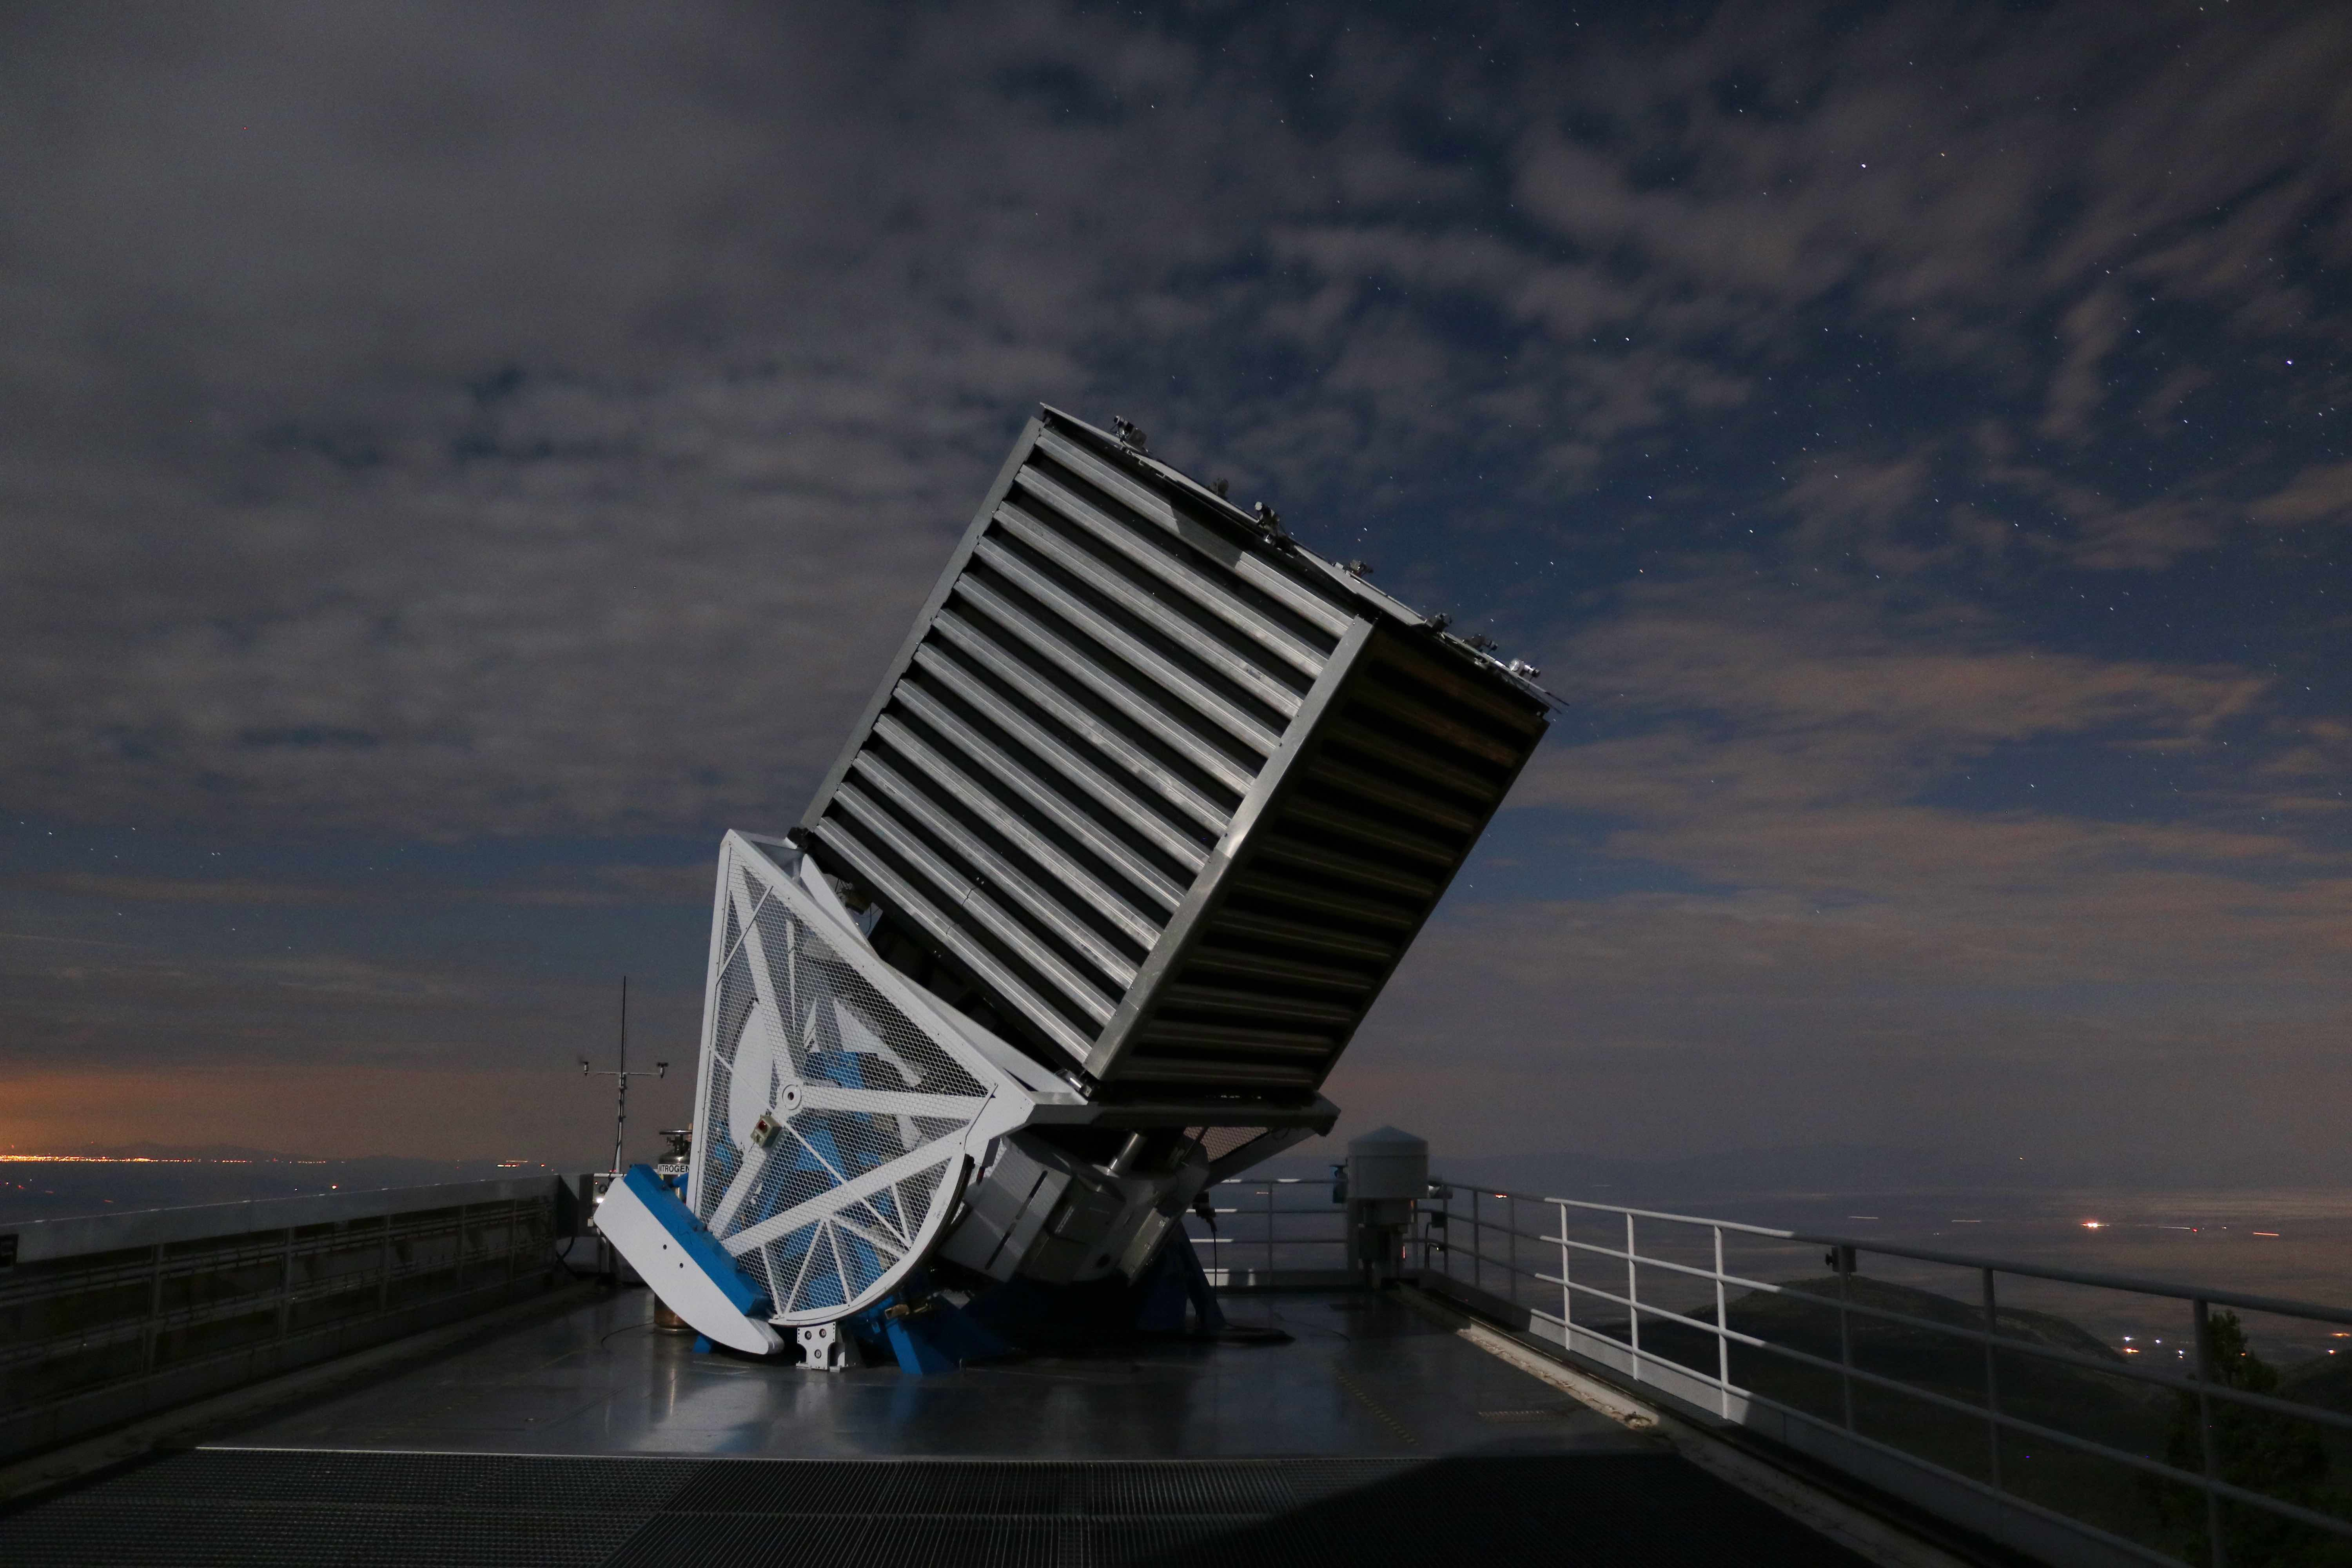

In [ ]:
#@title  
Image('Apache-0110.jpg', width=500)
Image('sdss_gaulme1.jpg',width=300)

# Sloan Digital Sky Survey DR14



Classification of Stars, Galaxies and Quasars

En este dataset se va a estudiar un PROBLEMA DE CLASIFICACIÓN, donde con ciertos datos, se va a predecir si una observación es:

*   Un Quásar
*   Una Galaxia
*   Una Estrella

Se van a aplicar los métodos de clasificación vistos en clase, un preprocesamiento respectivo, predecir valores y a realizar gráficas para un mejor entendimiento.



#Interpretando los datos

Se tienen 10000 muestras de objetos observados por telescopios ópticos específicos de 2.5 m de apertura angular situado en el observatorio Apache Point de Nuevo México.

Las caraterísticas que se tienen para cada objeto son:
1. **ra**, **dec** - *ascensión* y *declinación* respectivamente, con respecto al sistemas ecuatorial de coordenadas.
2. **u**, **g**, **r**, **i** y **z** - filtros de el sistema fotométrico utilizado
3. **run**, **camcol**, **field** -  Descriptores de campos dentro de la imagen
4. **redshift**: Desplazamiento al rojo, aumento de la longitud de onda debido al movimiento del objeto astronómico por efecto Doppler. (Esta cantidad puede ser negativa, entoncés nos encotrariamos con **blueshift** o desplazamiento al azul)
5. **mjd** – modified Julian date of observation
6. **fiberid** – optic fiber ID

# 1 IMPORTAR LAS LIBRERÍAS

In [5]:
#@title 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__


'1.1.5'

# 2 IMPORTAR EL DATASET

In [9]:
# SE SUBE EL DATASET AL NOTEBOOK DE MANERA TEMPORAL

ds = pd.read_csv('Dataset_Skyloan.csv')
dataset = pd.read_csv('Dataset_Skyloan.csv')

In [9]:
ds.head()

objid          ra       dec  ...  plate    mjd  fiberid
0  1.237650e+18  183.531326  0.089693  ...   3306  54922      491
1  1.237650e+18  183.598371  0.135285  ...    323  51615      541
2  1.237650e+18  183.680207  0.126185  ...    287  52023      513
3  1.237650e+18  183.870529  0.049911  ...   3306  54922      510
4  1.237650e+18  183.883288  0.102557  ...   3306  54922      512

[5 rows x 18 columns]

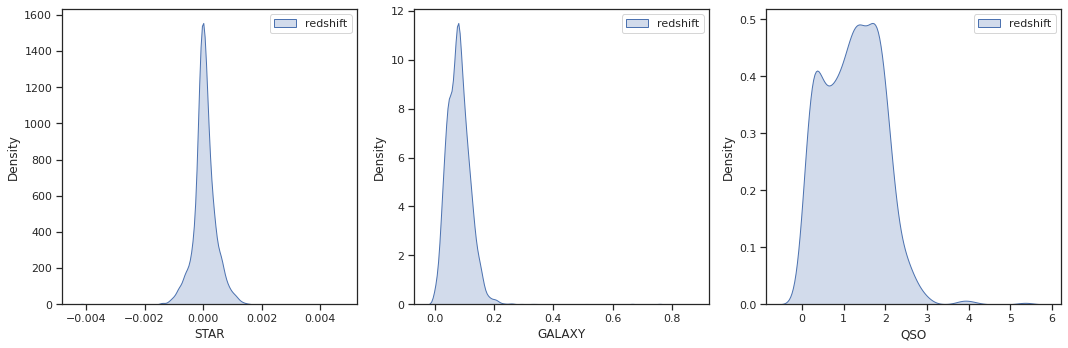

In [ ]:
#@title Densidad de probabilidad en redshift y distancia[MPC]
featurecols = ['redshift']
plt.figure(figsize=(15,5))
sns.set_style("ticks")
astrObjs = ds['class'].unique()
for i in range(len(astrObjs)):
    plt.subplot(1, 3, i+1)
    for j in range(len(featurecols)):
        sns.distplot(ds[ds['class']==astrObjs[i]][featurecols[j]], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 1}, 
                     label = featurecols[j])
    plt.legend()
    plt.xlabel(astrObjs[i])
    plt.ylabel('Density')
plt.tight_layout()


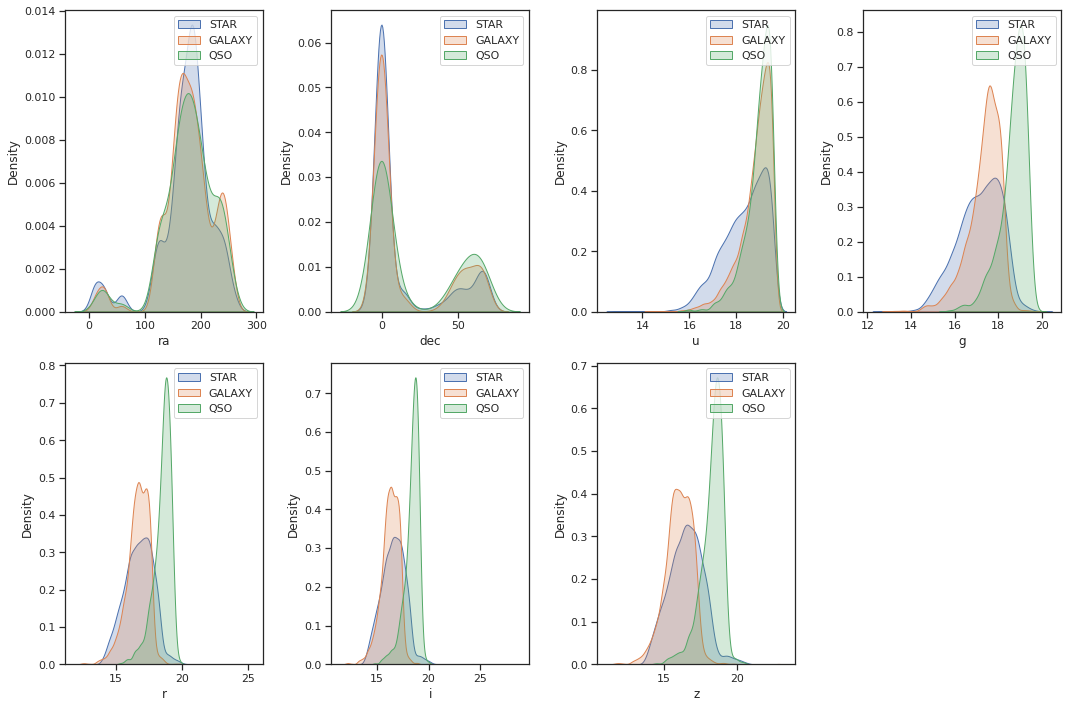

In [ ]:
#@title Distribución de objetos en función de su banda
import warnings
warnings.filterwarnings('ignore')

featuredf = ds.drop(['class','objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift'], axis=1)

featurecols = featuredf.keys()
astrObjs = ds['class'].unique()

plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(2, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(ds[ds['class'] == astrObjs[j]][featurecols[i]], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 1}, 
                     label = astrObjs[j])
    plt.legend()
    plt.xlabel(featurecols[i])
plt.tight_layout()

In [10]:
#Eliminamos columnas innecesarias
del dataset['objid']
del dataset['rerun']
del dataset['plate']

#VARIABLE DEPENDIENTE
y = dataset['class'].values
data = dataset.copy()
del dataset['class']


X = dataset.iloc[:, :].values
#Eliminamos la serie de clasificación

In [ ]:
#@title **code** Dataset Normalizado
data

ra        dec         u  ...  redshift    mjd  fiberid
0     183.531326   0.089693  19.47406  ... -0.000009  54922      491
1     183.598371   0.135285  18.66280  ... -0.000055  51615      541
2     183.680207   0.126185  19.38298  ...  0.123111  52023      513
3     183.870529   0.049911  17.76536  ... -0.000111  54922      510
4     183.883288   0.102557  17.55025  ...  0.000590  54922      512
...          ...        ...       ...  ...       ...    ...      ...
9995  131.316413  51.539547  18.81777  ...  0.027583  51877      246
9996  131.306083  51.671341  18.27255  ...  0.117772  51877      228
9997  131.552562  51.666986  18.75818  ... -0.000402  57013      622
9998  131.477151  51.753068  18.88287  ...  0.014019  51877      229
9999  131.665012  51.805307  19.27586  ...  0.118417  51877      233

[10000 rows x 15 columns]

In [11]:
#@title **code** Desviaciones Estandar
sds = np.std(data, axis = 0)
sds

ra           4.778105e+01
dec          2.521095e+01
u            8.286146e-01
g            9.454099e-01
r            1.067711e+00
i            1.141748e+00
z            1.203128e+00
run          2.732914e+02
camcol       1.666100e+00
field        1.625696e+02
specobjid    2.013898e+18
redshift     3.887546e-01
mjd          1.511075e+03
fiberid      2.062878e+02
dtype: float64

In [12]:
#@title **code** Funcion de ploteo
sd = np.std(X, axis = 0)
for i in sd:
  print("Desviación estandar: %.3f"%i)
print("La columna con menos dispersion es: ",np.argmin(sds))


Desviación estandar: 47.781
Desviación estandar: 25.211
Desviación estandar: 0.829
Desviación estandar: 0.945
Desviación estandar: 1.068
Desviación estandar: 1.142
Desviación estandar: 1.203
Desviación estandar: 273.291
Desviación estandar: 1.666
Desviación estandar: 162.570
Desviación estandar: 2013897790424641280.000
Desviación estandar: 0.389
Desviación estandar: 1511.075
Desviación estandar: 206.288
La columna con menos dispersion es:  11


[11  2  3  4  5  6  8  1  0  9 13  7 12 10]
[11  2]


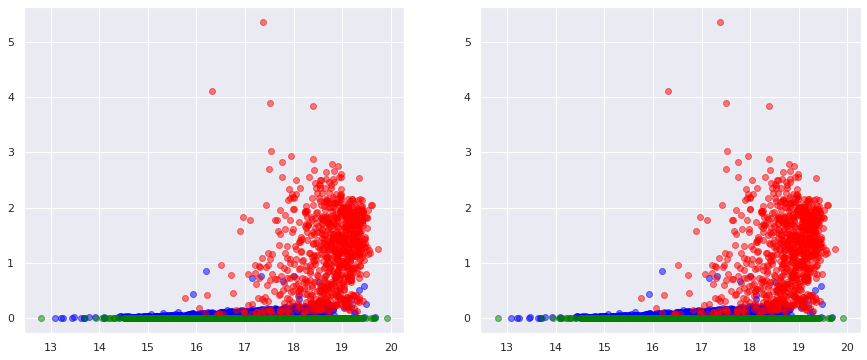

In [13]:
#@title **code** Agrupación de los datos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_ = le.fit_transform(y)

mejoresColumnas = np.argsort(sd)
print(mejoresColumnas)
print(mejoresColumnas[:2])
#X_plot = X[:,mejoresColumnas[:2]]
plt.figure(figsize = (15,6))
plt.subplot(121)
X_plot = X[:, [3,11]]
plot_2Ddata_with_boundary(None, X_plot,y_, alpha = .5)
plt.subplot(122)
x_plot = X[:, [2,11]]
plot_2Ddata_with_boundary(None, X_plot,y_, alpha = .5)

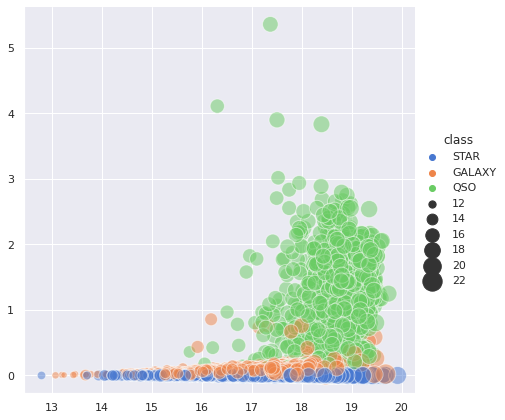

In [14]:
variable_x = X[:,3]
variable_y = X[:,11]
variable_s = X[:,6]
sns.relplot(x=variable_x, y=variable_y, hue="class", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

# 3 PREPROCESAR VARIABLES DEPENDIENTES (CLASIFICACIÓN) O INDEPENDIENTES

In [15]:
#LabelEncoder PARA PROCESAR LA VARIABLE DEPENDIENTE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:20])

# 0 --> GALAXY
# 1 --> QUASAR
# 2 --> STAR

[2 2 0 2 2 2 0 2 2 0 2 2 2 2 0 1 2 1 2 0]


# 4 MATRIZ DE CORRELACIÓN

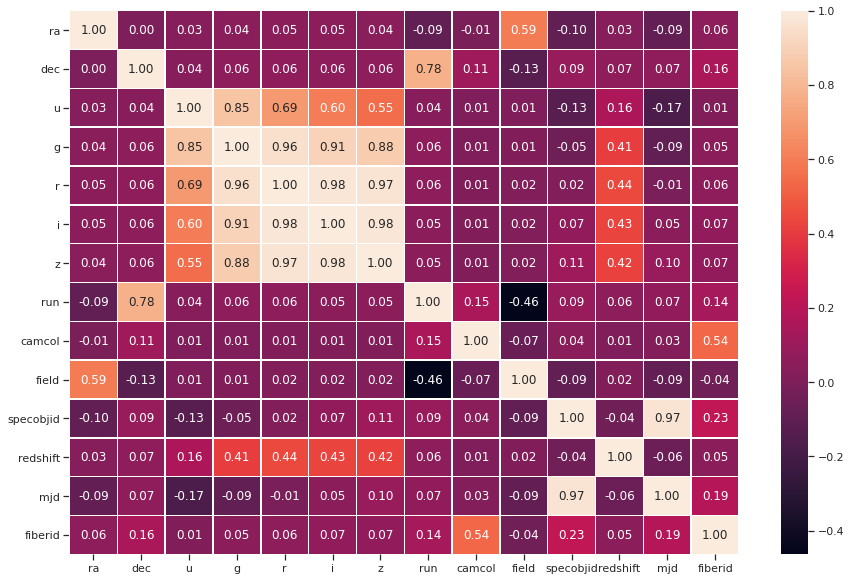

In [ ]:
#@title **code** Matriz de Correlación.
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(dataset.corr(), annot=True, fmt=".2f",  linewidths=.5, ax=ax)

# 5 CLASIFICADORES

In [ ]:
#DIVIDIR EN 0.25 Y 0.75 PRUEBA-ENTRENAMIENTO 

from sklearn.model_selection import train_test_split #es una métrica de selección de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #obtengo los datos que voy a utilizar para entrenar la máquina.



# 5.1 NAIVE BAYES

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler #preprocesamiento de datos con standarScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #realizo una transformación de normalización z, donde se le resta la media y se divide por la desviación estandar.
X_test = sc.transform(X_test)

#Entrenamiento
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() #estimador
classifier.fit(X_train, y_train) #entrenamiento de la máquina con el 75% de los datos

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import *
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[2 2]
 [1 1]
 [0 0]
 ...
 [0 0]
 [2 2]
 [0 0]]
[[1215   32    4]
 [  16  204    0]
 [  11   10 1008]]
0.9708


# 5.2 SVC

In [ ]:
#Usa feature scaling también

#Entrenamiento 
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[2 2]
 [1 1]
 [0 0]
 ...
 [0 0]
 [2 2]
 [0 0]]
[[1224    4   23]
 [   7  213    0]
 [   6    0 1023]]
0.984


# 5.3 KERNEL SVC

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[2 2]
 [1 1]
 [0 0]
 ...
 [0 0]
 [2 2]
 [2 0]]
[[1209    3   39]
 [  15  202    3]
 [  46    0  983]]
0.9576


# 5.4 DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[2 2]
 [1 1]
 [0 0]
 ...
 [0 0]
 [2 2]
 [0 0]]
[[1231   18    2]
 [  18  202    0]
 [   3    0 1026]]
0.9836


DATASET ORIGINAL CON COLUMNAS ELIMINADAS

# 5.5 RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 2]
 [1 1]
 [0 0]
 ...
 [0 0]
 [2 2]
 [0 0]]
[[1243    5    3]
 [  18  202    0]
 [   0    0 1029]]


0.9896

In [ ]:
from sklearn.ensemble import RandomForestClassifier
predictions = list()
scoresRf = list()

for i in range(2,6):
  rs = RandomForestClassifier(n_estimators = i, criterion = 'entropy')
  rs.fit(X_train, y_train)
  predictions.append(rs.predict(X_test))
  scoresRf.append(rs.score(X_test, y_test))




# **Tunning Experimental**:
En esta sección se va a realizar una experimentación de los datos parametrizando los estimadores de clasificación.

In [ ]:
from sklearn.svm import SVC
kernels = ['linear','poly','rbf']
scores = list()
for i in kernels:
  est = SVC(kernel = i, random_state = 0)
  est.fit(X_train,y_train) #entreno la máquina con los datos de entrenamiento
  scores.append(est.score(X_test,y_test))

In [ ]:
scores #puntajes de clasificacion.

[0.984, 0.9248, 0.9576]

**TUNING DE DECISION TREE CLASSIFIER**

[0.9852, 0.9844, 0.982, 0.9852, 0.9848, 0.9872, 0.9844, 0.9856, 0.9852, 0.9864]


Text(0.5, 1.0, 'Decision Tree Classifier')

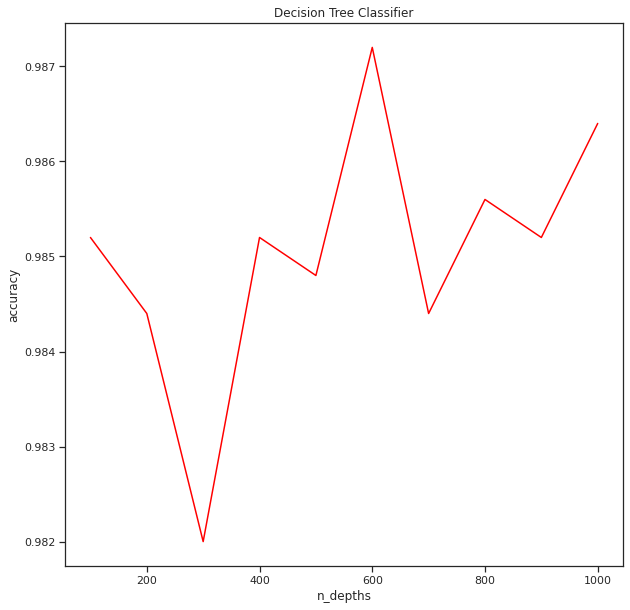

In [ ]:
from sklearn.tree import DecisionTreeClassifier
columnsImportances = list()
scores = list()
#estimador1 = DecisionTreeClassifier(criterion = 'gini').fit(X_train,y_train)
#scores.append(estimador1.score(X_test,y_test))
nDepths = range(100,1100,100)
for i in nDepths:
  #aux = list()
  est = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
  est.fit(X_train, y_train)
  #aux.append(est.feature_importances_)
  columnsImportances.append(est.feature_importances_)
  scores.append(est.score(X_test,y_test))

print(scores)
plt.figure(figsize=(10,10))
plt.plot(nDepths, scores, color="red")
plt.xlabel("n_depths");plt.ylabel("accuracy")
plt.title("Decision Tree Classifier")

#**TABLA DE SCORES POR PROFUNDIDAD**

In [ ]:

columns = np.array(columnsImportances) #una lista con la importancia de columnas de cada iteración de su respectiva profundidad en el DTC
index = list()
for i in columns:
   index.append(np.argsort(i))  #me devuelve la lista ordenada de menor a mayor, de las respectivas columnas con más importancia.
   

resultados = pd.DataFrame({'N_DEPTHS':nDepths, 'Scores':scores})
resultados


N_DEPTHS  Scores
0       100  0.9852
1       200  0.9844
2       300  0.9820
3       400  0.9852
4       500  0.9848
5       600  0.9872
6       700  0.9844
7       800  0.9856
8       900  0.9852
9      1000  0.9864

In [ ]:
columnsImportances = pd.DataFrame(columnsImportances)
columnsImportances['Depth'] = nDepths
columnsImportances

0         1         2         3  ...        11        12        13  Depth
0  0.002218  0.001829  0.010128  0.010763  ...  0.959960  0.000930  0.003840    100
1  0.002602  0.001479  0.008503  0.011801  ...  0.960171  0.000795  0.003518    200
2  0.002762  0.000731  0.009268  0.011415  ...  0.960171  0.000657  0.003518    300
3  0.002963  0.000731  0.009785  0.011796  ...  0.959960  0.000729  0.003011    400
4  0.001664  0.003090  0.008779  0.012084  ...  0.959960  0.000966  0.003565    500
5  0.001664  0.002930  0.008847  0.010275  ...  0.959683  0.000000  0.004338    600
6  0.002602  0.002664  0.008708  0.010751  ...  0.959960  0.000765  0.003439    700
7  0.002325  0.000731  0.008503  0.012620  ...  0.959683  0.001072  0.004217    800
8  0.001664  0.001668  0.009062  0.013380  ...  0.959683  0.001765  0.003518    900
9  0.002101  0.001392  0.008503  0.010596  ...  0.959894  0.001283  0.003650   1000

[10 rows x 15 columns]

In [ ]:
#@title **code** Funcion de ploteo
def plot_DecisionTreeClassifier(nDepth,Xtr, Xts, ytr, yts, alpha=.1):
      est = DecisionTreeClassifier(criterion = 'entropy', max_depth = nDepth)
      est.fit(Xtr, ytr)
      plt.figure(figsize=(15,6))
      plt.subplot(121)
      plot_2Ddata_with_boundary(est.predict, Xts,yts, alpha=alpha)
      plt.title("TEST accuracy %.3f"%est.score(Xts, yts))

In [ ]:
index

[array([ 7,  8, 12, 10,  5,  9,  4,  1,  0, 13,  6,  2,  3, 11]),
 array([ 7,  4,  8, 12, 10,  1,  6,  9,  0, 13,  5,  2,  3, 11]),
 array([ 7, 12,  1,  8,  5, 10,  9,  0,  4,  6, 13,  2,  3, 11]),
 array([ 7, 12,  1,  8,  4, 10,  9,  5,  0, 13,  6,  2,  3, 11]),
 array([10,  7,  8, 12,  4,  5,  0,  9,  1, 13,  6,  2,  3, 11]),
 array([12, 10,  7,  8,  0,  6,  9,  4,  1,  5, 13,  2,  3, 11]),
 array([10,  7, 12,  8,  5,  9,  0,  1,  4,  6, 13,  2,  3, 11]),
 array([ 7,  4,  1,  8, 12, 10,  5,  9,  0, 13,  6,  2,  3, 11]),
 array([ 7,  4,  8, 10,  5,  0,  1,  9, 12,  6, 13,  2,  3, 11]),
 array([ 7, 10,  8, 12,  1,  9,  0,  4,  6,  5, 13,  2,  3, 11])]

In [ ]:
index = np.array(index)
print(np.sum(columns[0, index[0,-2:]]))

0.9707226285291183


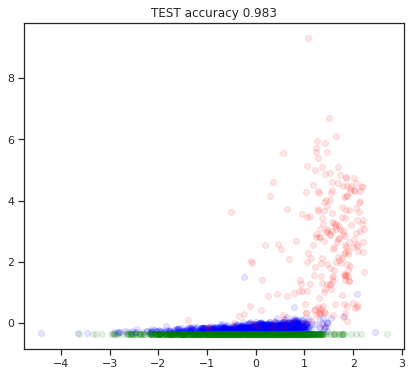

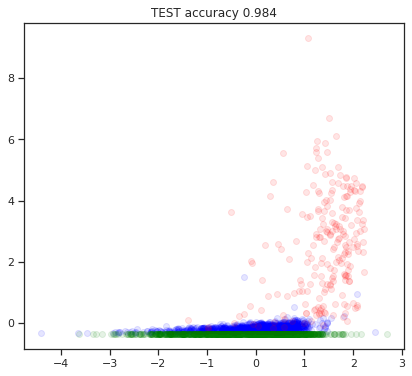

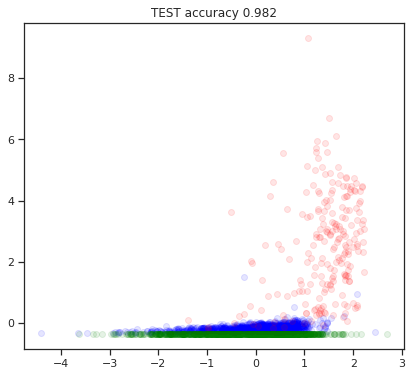

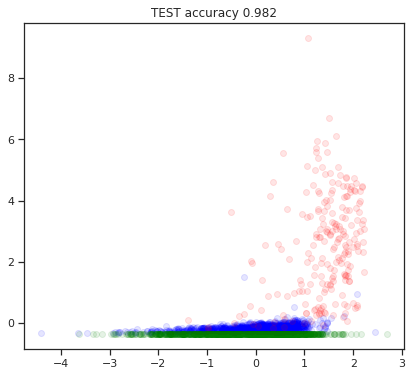

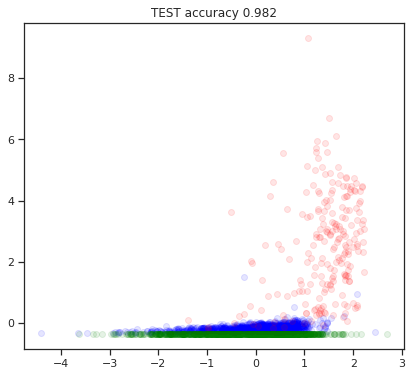

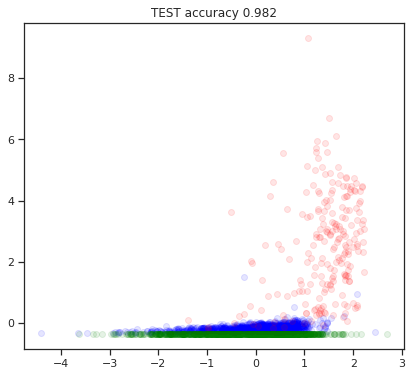

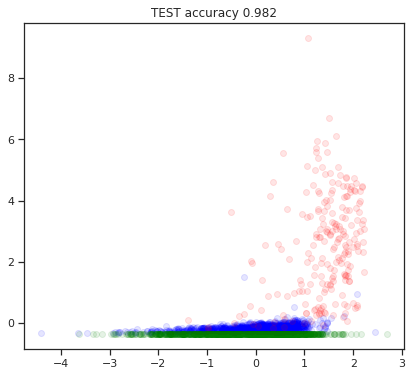

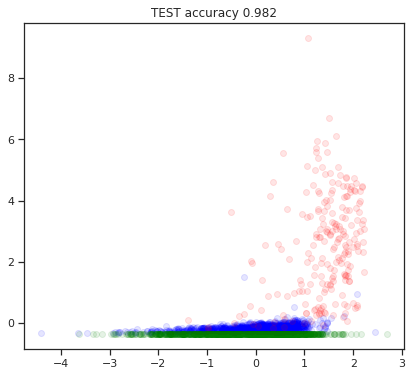

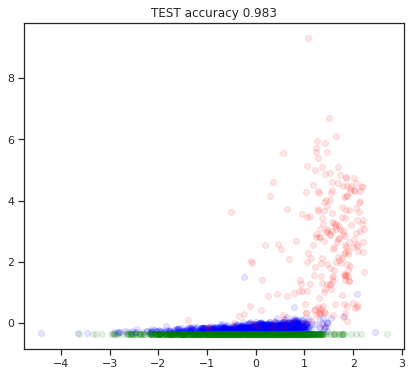

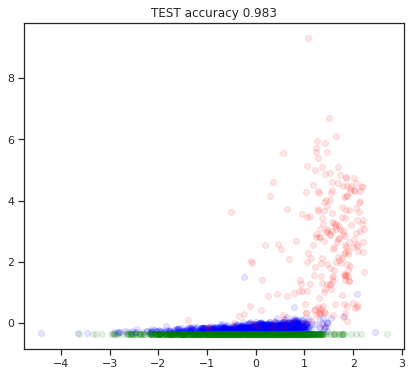

In [ ]:
n = 100

for j in index:#se toman las 2 mejores columnas para plotear
  X_tr = X_train[:,j[-2:]] 
  X_ts = X_test[:, j[-2:]]
  plot_DecisionTreeClassifier(n, X_tr, X_ts, y_train,y_test)
  n+=100



#**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rango = range(100,1100,100)
scores1 = list()
scores2 = list()

for i in rango:
  est1 = RandomForestClassifier(n_estimators = i, criterion = 'entropy', max_depth = 1000)
  est2 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', max_depth= i)
  est1.fit(X_train, y_train) 
  est2.fit(X_train, y_train)
  scores1.append(est1.score(X_test,y_test))
  scores2.append(est2.score(X_test,y_test))

In [ ]:
results1 = pd.DataFrame({'n_depth': rango, 'Scores': scores2})
results2 = pd.DataFrame({'n_estimators': rango, 'Scores': scores1})

Text(0.5, 1.0, 'RandomForest')

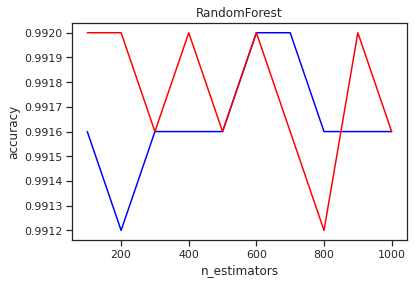

In [ ]:
plt.plot(range(100,1100,100), scores1, color="blue")
plt.plot(range(100,1100,100), scores2, color="red")
plt.xlabel("n_estimators");plt.ylabel("accuracy")
plt.title("RandomForest")

In [ ]:
#@title **code** Funcion de ploteo de regiones
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.1, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')


[11  2]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


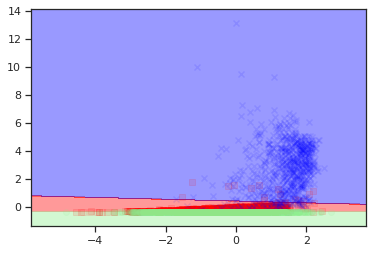

In [ ]:
#@title **code** Funcion de ploteo


mejoresColumnas
print(mejoresColumnas[:2])
X_trainB = X_train[:, [3,11]]
X_testB = X_test[:, [3,11]]
est.fit(X_trainB,y_train)
X_combined_std = np.vstack((X_trainB, X_testB))
y_combined = np.hstack((y_train, y_test))

svmLinear = SVC(kernel = 'linear', random_state = 0)
svmLinear.fit(X_trainB,y_train)
svmPoly = SVC(kernel = 'poly',degree = 3 ,random_state = 0)
svmPoly.fit(X_trainB,y_train)
svmRbf = SVC(kernel = 'rbf', random_state=0)
svmRbf.fit(X_trainB, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svmLinear,test_idx=range(7500,10000))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


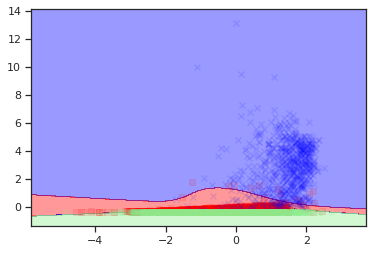

In [ ]:
plot_decision_regions(X_combined_std, y_combined, classifier=svmPoly,test_idx=range(7500,10000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


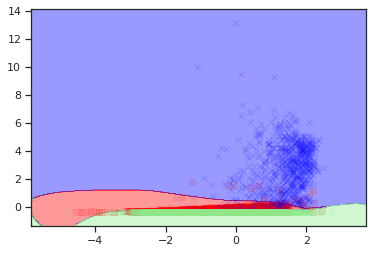

In [ ]:

plot_decision_regions(X_combined_std, y_combined, classifier=svmRbf,test_idx=range(7500,10000))

#**SVC**

In [ ]:
from sklearn.svm import SVC 
kernels = ['linear', 'poly', 'rbf']
scores = list()
predicts = list()
estimators = list()


for i in kernels:
  est = SVC(kernel = i,random_state = 0)
  est.fit(X_train, y_train)
  predicts.append(est.predict(X_test))
  scores.append(est.score(X_test, y_test))
  estimators.append(est)


datos = pd.DataFrame(kernels, scores)
datos



0
0.9840  linear
0.9248    poly
0.9576     rbf

In [ ]:
#@title **DNN Classification**

import tensorflow as tf

dnn1 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(16, activation=tf.nn.relu),
      tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])


dnn1.compile(loss='sparse_categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=['accuracy']
               )

dnn1.fit(X_train, y_train, epochs=50, batch_size=32)
test_loss, test_acc = dnn1.evaluate(X_test, y_test)

print(test_loss, "|", test_acc)

Epoch 1/50
235/235 [==============================] - 4s 2ms/step - loss: 0.9738 - accuracy: 0.6416
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8724
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.9107
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9260
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9384
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9480
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9564
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9625
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9652
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9719